

# Data Space Report

<img src="images/polito_logo.png" width="400" alt="Polito Logo" style="width: 200px;">

\begin{figure}[h]
\caption{Polito Logo}
\centering
\includegraphics[width=0.5\textwidth]{images/polito_logo.png}
\end{figure}


## Pittsburgh Bridges Data Set

<img src="images/andy_warhol_bridge.jpg" alt="Andy Warhol Bridge" style="width: 200px;"/>
\begin{figure}[h]
\caption{Andy Warhol Bridge - Pittsburgh.}
\centering
\includegraphics[width=0.5\textwidth]{images/andy_warhol_bridge.jpg}
\end{figure}

    

Report created by Student Francesco Maria Chiarlo s253666, for A.A 2019/2020.

**Abstract**:The aim of this report is to evaluate the effectiveness of distinct, different statistical learning approaches, in particular focusing on their characteristics as well as on their advantages and backwards when applied on a relatively small dataset as the one employed within this report, that is Pittsburgh Bridgesdataset.

**Key words**:Statistical Learning, Machine Learning, Bridge Design.

### Imports Section <a class="anchor" id="imports-section"></a>

In [1]:
from utils.all_imports import *;
%matplotlib inline

# Set seed for notebook repeatability
np.random.seed(0)

None


### Dataset's Attributes Description <a class="anchor" id="attributes-description"></a>

The analyses that I aim at accomplishing while using as means the methods or approaches provided by both Statistical Learning and Machine Learning fields, concern the dataset Pittsburgh Bridges, and what follows is a overview and brief description of the main characteristics, as well as, basic information about this precise dataset.

The Pittsburgh Bridges dataset is a dataset available from the web site called mainly *"UCI Machine Learing Repository"*, which is one of the well known web site that let a large amount of different datasets, from different domains or fields, to be used for machine-learning research and which have been cited in peer-reviewed academic journals.

In particular, the dataset I'm going to treat and analyze, which is Pittsburgh Bridges dataset, has been made freely available from the Western Pennsylvania Regional Data Center (WPRDC), which is a project led by the University Center of Social and Urban Research (UCSUR) at the University of Pittsburgh ("University") in collaboration with City of Pittsburgh and The County of Allegheny in Pennsylvania. The WPRDC and the WPRDC Project is supported by a grant from the Richard King Mellon Foundation.

In order to be more precise, from the official and dedicated web page, within UCI Machine Learning cite, Pittsburgh Bridges dataset is a dataset that has been created after the works of some co-authors which are:
- Yoram Reich & Steven J. Fenves from Department of Civil Engineering and Engineering Design Research Center Carnegie Mellon University Pittsburgh, PA 15213

The Pittsburgh Bridges dataset is made of up to 108 distinct observations and each of that data sample is made of 12 attributes or features where some of them are considered to be continuous properties and other to be categorical or nominal properties. Those variables are the following:

- **RIVER**: which is a nominal type variable that can assume the subsequent possible discrete values which are: A, M, O. Where A stands for Allegheny river, while M stands for Monongahela river and lastly O stands for Ohio river.


<img src="images/pittsburgh_city.jpg" alt="Pittsburgh city" style="width: 500px;"/>
\begin{figure}[h]
\caption{Pittsburgh city}
\centering
\includegraphics[width=0.5\textwidth]{images/pittsburgh_city.jpg}
\end{figure}

- **LOCATION**: which represents a nominal type variable too, and assume a positive integer value from 1 up to 52 used as categorical attribute.
- **ERECTED**: which might be either a numerical or categorical variable, depending on the fact that we want to aggregate a bunch of value under a categorical quantity. What this means is that, basically such attribute is made of date starting from 1818 up to 1986, but we may imagine to aggregate somehow these data within a given category among those suggested, that are CRAFTS, EMERGENING, MATURE, MODERN.
- **PURPOSE**: which is a categorical attribute and represents the reason why a particular bridge has been built, which means that this attribute represents what kind of vehicle can cross the bridge or if the bridge has been made just for people. For this reasons the allowd values for this attributes are the following: WALK, AQUEDUCT, RR, HIGHWAY. Three out of four are self explained values, while RR value that might be tricky at first glance, it just stands for railroad.
- **LENGTH**: which represents the bridge's length, is a numerical attribute if we just look at the real number values that go from 804 up to 4558, but we can again decide to handle or arrange such values so that they can be grouped into range of values mapped into SHORT, MEDIUM, LONG so that we can refer to a bridge's length by means of these new categorical values.
- **LANES**: which is a categorical variable which is represented by numerical values, that are 1, 2, 4, 6 which indicate the number of distinct lanes that a bridge in Pittsburgh city may have. The larger the value the wider the bridge.
- **CLEAR-G**: specifies  whether  a  vertical  navigation clearance requirement was enforced in the design or not.
- **T-OR-D**: which is a nominal attribute, in other words, a categorical attribute that can assume THROUGH, DECK values. In order to be more precise, this samples attribute deals with structural elements of a bridge. In fact, a deck is the surface of a bridge and this structural element, of bridge's superstructure, may be constructed of concrete, steel, open grating, or wood. On the other hand, a through arch bridge, also known as a half-through arch bridge or a through-type arch bridge, is a bridge that is made from materials such as steel or reinforced concrete, in which the base of an arch structure is below the deck but the top rises above it.

<img src="images/Parts_of_a_truss_bridge.png" alt="The various parts of a truss bridge" style="width: 500px;"/>
\begin{figure}[h]
\caption{The various parts of a truss bridge}
\centering
\includegraphics[width=0.5\textwidth]{images/Parts_of_a_truss_bridge.png}
\end{figure}


- **MATERIAL**: which is a categorical or nominal variable and is used to describe the bridge telling which is the main or core material used to build it.
  This attribute can assume one of the possible, following values which are: WOOD, IRON, STEEL. Furthermore, we expect to see somehow a bit of correlation between the values assumed by the pairs represented by T-OR-D and MATERIAL columns, when looking just to them.
- **SPAN**: which is a categorical or nominal value and has been recorded by means of three possible values for each sample, that are SHORT, MEDIUM, LONG. This attribute, within the field of Structural Engineering, is the distance between two intermediate supports for a structure, e.g. a beam or a bridge. A span can be closed by a solid beam or by a rope. The first kind is used for bridges, the second one for power lines, overhead telecommunication lines, some type of antennas or for aerial tramways. 

<img src="images/span_bridge.png" alt="span bridge" style="width: 500px;"/>
\begin{figure}[h]
\caption{Span Bridge Example}
\centering
\includegraphics[width=0.5\textwidth]{images/span_bridge.png}
\end{figure}

- **REL-L**: which is a categorical or nominal variable and stands for relative length of the main span of the bridge to the total crossing length, it can assume three possible values that are S, S-F, F.
- Lastly, **TYPE** which indicates as a categorical or nominal attributes what type of bridge each record represents, among the possible 6 distinct classes or types of bridges that are: WOOD, SUSPEN, SIMPLE-T, ARCH, CANTILEV, CONT-T.

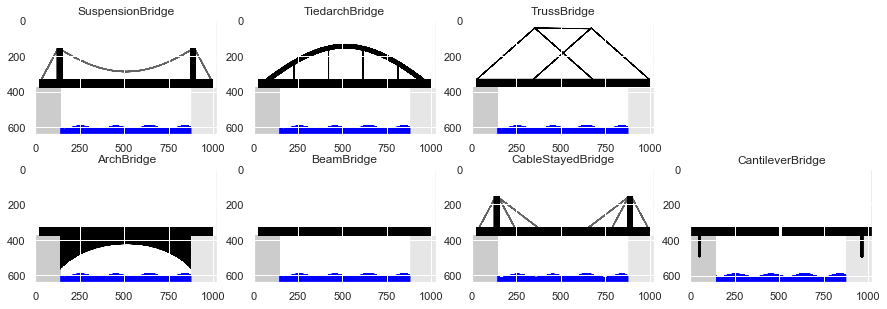

In [2]:
# Show TYPE of Bridges
# ------------------------
show_bridges_types_images()

### Data Investigation <a class="anchor" id="data-preparation"></a>

The aim of this chapter is to get in the data, that are available within Pittsburgh Bridge Dataset, in order to investigate a bit more in to detail and generally speaking deeper the main or high level statistics quantities, such as mean, median, standard deviation of each attribute, as well as displaying somehow data distribution for each attribute by means of histogram plots. This phase allows or enables us to decide which should be the best feature to be selected as the target variable, in other word the attribute that will represent the dependent variable with respect to the remaining attributes that instead will play the role of predictors and independent variables, as well.

In order to investigate and explore our data we make usage of *Pandas library*. We recall mainly that, in computer programming, Pandas is a software library written for the Python programming language* for *data manipulation and analysis*. In particular, it offers data structures and operations for manipulating numerical tables and time series. It is free software and a interesting and funny things about such tool is that the name is derived from the term "panel data", an econometrics term for data sets that include observations over multiple time periods for the same individuals.
We also note that as the analysis proceeds we will introduce other computer programming as well as programming libraries that allow or enable us to fulfill our goals.

Initially, once I have downloaded from the provided web page the dataset with the data samples about Pittsburgh Bridge we load the data by means of functions available using python library's pandas. We notice that the overall set of data points is large up to 108 records or rows, which are sorted by Erected attributes, so this means that are sorted in decreasing order from the oldest bridge which has been built in 1818 up to the most modern bridge that has been erected in 1986. Then we display the first 5 rows to get an overview and have a first idea about what is inside the overall dataset, and the result we obtain by means of head() function applied onto the fetched dataset is equals to what follows:

### Read Input Data

In [3]:
# Some global script variables
# --------------------------------------------------------------------------- #
dataset_path, dataset_name, column_names, TARGET_COL = \
    get_dataset_location() # Info Data to be fetched
estimators_list, estimators_names = get_estimators() # Estimator to be trained

# variables used for pass through arrays used to store results
pos_gs = 0; pos_cv = 0

# Array used for storing graphs
plots_names = list(map(lambda xi: f"{xi}_learning_curve.png", estimators_names))
pca_kernels_list = ['linear', 'poly', 'rbf', 'cosine', 'sigmoid']
cv_list = list(range(10, 1, -1))

In [4]:
# Parameters to be tested for Cross-Validation Approach
# -----------------------------------------------------
param_grids = []
parmas_logreg = {
    'penalty': ('l1', 'l2', 'elastic', None),
    'solver': ('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'),
    'fit_intercept': (True, False),
    'tol': (1e-4, 1e-3, 1e-2),
    'class_weight': (None, 'balanced'),
    'C': (10.0, 1.0, .1, .01, .001, .0001),
    # 'random_state': (0,),
}; param_grids.append(parmas_logreg)

parmas_knn_clf = {
    'n_neighbors': (2,3,4,5,6,7,8,9,10),
    'weights': ('uniform', 'distance'),
    'metric': ('euclidean', 'minkowski', 'manhattan'),
    'leaf_size': (5, 10, 15, 30),
    'algorithm': ('ball_tree', 'kd_tree', 'brute'),
}; param_grids.append(parmas_knn_clf)

params_sgd_clf = {
    'loss': ('log', 'modified_huber'), # ('hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron')
    'penalty': ('l2', 'l1', 'elasticnet'),
    'alpha': (1e-1, 1e-2, 1e-3, 1e-4),
    'max_iter': (50, 100, 150, 200, 500, 1000, 1500, 2000, 2500),
    'class_weight': (None, 'balanced'),
    'learning_rate': ('optimal',),
    'tol': (None, 1e-2, 1e-4, 1e-5, 1e-6),
    # 'random_state': (0,),
}; param_grids.append(params_sgd_clf)

kernel_type = 'svm-rbf-kernel'
params_svm_clf = {
    # 'gamma': (1e-7, 1e-4, 1e-3, 1e-2, 0.1, 1.0, 10, 1e+2, 1e+3, 1e+5, 1e+7),
    'gamma': (1e-5, 1e-3, 1e-2, 0.1, 1.0, 10, 1e+2, 1e+3, 1e+5),
    'max_iter':(1e+2, 1e+3, 2 * 1e+3, 5 * 1e+3, 1e+4, 1.5 * 1e+3),
    'degree': (1,2,4,8),
    'coef0': (.001, .01, .1, 0.0, 1.0, 10.0),
    'shrinking': (True, False),
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid',],
    'class_weight': (None, 'balanced'),
    'C': (1e-4, 1e-3, 1e-2, 0.1, 1.0, 10, 1e+2, 1e+3),
    'probability': (True,),
}; param_grids.append(params_svm_clf)

parmas_tree = {
    'splitter': ('random', 'best'),
    'criterion':('gini', 'entropy'),
    'max_features': (None, 'sqrt', 'log2'),
    'max_depth': (None, 3, 5, 7, 10,),
    'splitter': ('best', 'random',),
    'class_weight': (None, 'balanced'),
}; param_grids.append(parmas_tree)

parmas_random_forest = {
    'n_estimators': (3, 5, 7, 10, 30, 50, 70, 100, 150, 200),
    'criterion':('gini', 'entropy'),
    'bootstrap': (True, False),
    'min_samples_leaf': (1,2,3,4,5),
    'max_features': (None, 'sqrt', 'log2'),
    'max_depth': (None, 3, 5, 7, 10,),
    'class_weight': (None, 'balanced', 'balanced_subsample'),
}; param_grids.append(parmas_random_forest)

# Some variables to perform different tasks
# -----------------------------------------------------
N_CV, N_KERNEL, N_GS = 9, 5, 6;
nrows = N_KERNEL // 2 if N_KERNEL % 2 == 0 else N_KERNEL // 2 + 1;
ncols = 2; grid_size = [nrows, ncols]

In [5]:
# READ INPUT DATASET
# --------------------------------------------------------------------------- #
dataset = pd.read_csv(os.path.join(dataset_path, dataset_name), names=column_names, index_col=0)

In [6]:
# SHOW SOME STANDARD DATASET INFOS
# --------------------------------------------------------------------------- #
print('Dataset shape: {}'.format(dataset.shape)); print(dataset.info())

Dataset shape: (108, 12)
<class 'pandas.core.frame.DataFrame'>
Index: 108 entries, E1 to E109
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   RIVER     108 non-null    object
 1   LOCATION  108 non-null    object
 2   ERECTED   108 non-null    int64 
 3   PURPOSE   108 non-null    object
 4   LENGTH    108 non-null    object
 5   LANES     108 non-null    object
 6   CLEAR-G   108 non-null    object
 7   T-OR-D    108 non-null    object
 8   MATERIAL  108 non-null    object
 9   SPAN      108 non-null    object
 10  REL-L     108 non-null    object
 11  TYPE      108 non-null    object
dtypes: int64(1), object(11)
memory usage: 11.0+ KB
None


In [7]:
# SHOWING FIRSTS N-ROWS AS THEY ARE STORED WITHIN DATASET
# --------------------------------------------------------------------------- #
dataset.head(5)

,RIVER,LOCATION,ERECTED,PURPOSE,LENGTH,LANES,CLEAR-G,T-OR-D,MATERIAL,SPAN,REL-L,TYPE
E1,M,3,1818,HIGHWAY,?,2,N,THROUGH,WOOD,SHORT,S,WOOD
E2,A,25,1819,HIGHWAY,1037,2,N,THROUGH,WOOD,SHORT,S,WOOD
E3,A,39,1829,AQUEDUCT,?,1,N,THROUGH,WOOD,?,S,WOOD
E5,A,29,1837,HIGHWAY,1000,2,N,THROUGH,WOOD,SHORT,S,WOOD
E6,M,23,1838,HIGHWAY,?,2,N,THROUGH,WOOD,?,S,WOOD


What we can notice from just the table above is that there are some attributes that are characterized by a special character that is '?' which stands for a missing value, so by chance there was not possibility to get the value for this attribute, such as for LENGTH and SPAN attributes. Analyzing in more details the dataset we discover that there are up to 6 different attributes, in the majority attributes with categorical or nominal nature such as CLEAR-G, T-OR-D, MATERIAL, SPAN, REL-L, and TYPE that contain at list one row characterized by the fact that one of its attributes is set to assuming '?' value that stands, as we already know for a missing value.

Here, we can follow different strategies that depends onto the level of complexity as well as accuracy we want to obtain or achieve for models we are going to fit to the data after having correctly pre-processed them, speaking about what we could do with missing values. In fact one can follow the simplest way and can decide to simply discard those rows that contain at least one attribute with a missing value represented by the '?' symbol. Otherwise one may alos decide to follow a different strategy that aims at keeping also those rows that have some missing values by means of some kind of technique that allows to establish a potential substituting value for the missing one.

So, in this setting, that is our analyses, we start by just leaving out those rows that at least contain one attribute that has a missing value, this choice leads us to reduce the size of our dataset from 108 records to 70 remaining samples, with a drop of 38 data examples, which may affect the final results, since we left out more or less the 46\% of the data because of missing values.

In [8]:
# INVESTIGATING DATASET IN ORDER TO DETECT NULL VALUES
# --------------------------------------------------------------------------- #
# print('Before preprocessing dataset and handling null values')
result = dataset.isnull().values.any(); # print('There are any null values ? Response: {}'.format(result))
result = dataset.isnull().sum(); # print('Number of null values for each predictor:\n{}'.format(result))

In [9]:
# DISCOVERING VALUES WITHIN EACH PREDICTOR DOMAIN
# --------------------------------------------------------------------------- #
columns_2_avoid = ['ERECTED', 'LENGTH', 'LOCATION', 'LANES']
list_columns_2_fix = show_categorical_predictor_values(dataset, columns_2_avoid)

In [10]:
# FIXING, UPDATING NULL VALUES CODED AS '?' SYMBOL
# WITHIN EACH CATEGORICAL VARIABLE, IF DETECTED ANY
# --------------------------------------------------------------------------- #
print('"Before" removing \'?\' rows, Dataset dim:', dataset.shape)
for _, predictor in enumerate(list_columns_2_fix):
    dataset = dataset[dataset[predictor] != '?']
print('"After" removing \'?\' rows, Dataset dim: ', dataset.shape); print('-' * 50)
_ = show_categorical_predictor_values(dataset, columns_2_avoid)

"Before" removing '?' rows, Dataset dim: (108, 12)
"After" removing '?' rows, Dataset dim:  (88, 12)
--------------------------------------------------


In [11]:
# INTERMEDIATE RESULT FOUND
# --------------------------------------------------------------------------- #
features_vs_values = preprocess_categorical_variables(dataset, columns_2_avoid); print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
Index: 88 entries, E1 to E90
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   RIVER     88 non-null     int64 
 1   LOCATION  88 non-null     object
 2   ERECTED   88 non-null     int64 
 3   PURPOSE   88 non-null     int64 
 4   LENGTH    88 non-null     object
 5   LANES     88 non-null     object
 6   CLEAR-G   88 non-null     int64 
 7   T-OR-D    88 non-null     int64 
 8   MATERIAL  88 non-null     int64 
 9   SPAN      88 non-null     int64 
 10  REL-L     88 non-null     int64 
 11  TYPE      88 non-null     int64 
dtypes: int64(9), object(3)
memory usage: 8.9+ KB
None


In [12]:
dataset.head(5)

,RIVER,LOCATION,ERECTED,PURPOSE,LENGTH,LANES,CLEAR-G,T-OR-D,MATERIAL,SPAN,REL-L,TYPE
E1,2,3,1818,2,?,2,2,2,3,3,2,6
E2,1,25,1819,2,1037,2,2,2,3,3,2,6
E5,1,29,1837,2,1000,2,2,2,3,3,2,6
E7,1,27,1840,2,990,2,2,2,3,2,2,6
E8,1,28,1844,1,1000,1,2,2,1,3,2,5


The next step is represented by the effort of mapping categorical variables into numerical variables, so that them are comparable with the already existing numerical or continuous variables, and also by mapping the categorical variables into numerical variables we allow or enable us to perform some kind of normalization or just transformation onto the entire dataset in order to let some machine learning algorithm to work better or to take advantage of normalized data within our pre-processed dataset. Furthermore, by transforming first the categorical attributes into a continuous version we are also able to calculate the \textit{heatmap}, which is a very useful way of representing a correlation matrix calculated on the whole dataset. Moreover we have displayed data distribution for each attribute by means of histogram representation to take some useful information about the number of occurrences for each possible value, in particular for those attributes that have a categorical nature.

In [13]:
# MAP NUMERICAL VALUES TO INTEGER VALUES
# --------------------------------------------------------------------------- #
print('Before', dataset.shape)
columns_2_map = ['ERECTED', 'LANES']
for _, predictor in enumerate(columns_2_map):
    dataset = dataset[dataset[predictor] != '?']
    dataset[predictor] = np.array(list(map(lambda x: int(x), dataset[predictor].values)))
print('After', dataset.shape); print(dataset.info())

Before (88, 12)
After (80, 12)
<class 'pandas.core.frame.DataFrame'>
Index: 80 entries, E1 to E90
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   RIVER     80 non-null     int64 
 1   LOCATION  80 non-null     object
 2   ERECTED   80 non-null     int32 
 3   PURPOSE   80 non-null     int64 
 4   LENGTH    80 non-null     object
 5   LANES     80 non-null     int32 
 6   CLEAR-G   80 non-null     int64 
 7   T-OR-D    80 non-null     int64 
 8   MATERIAL  80 non-null     int64 
 9   SPAN      80 non-null     int64 
 10  REL-L     80 non-null     int64 
 11  TYPE      80 non-null     int64 
dtypes: int32(2), int64(8), object(2)
memory usage: 7.5+ KB
None


In [14]:
dataset.head(5)

,RIVER,LOCATION,ERECTED,PURPOSE,LENGTH,LANES,CLEAR-G,T-OR-D,MATERIAL,SPAN,REL-L,TYPE
E1,2,3,1818,2,?,2,2,2,3,3,2,6
E2,1,25,1819,2,1037,2,2,2,3,3,2,6
E5,1,29,1837,2,1000,2,2,2,3,3,2,6
E7,1,27,1840,2,990,2,2,2,3,2,2,6
E8,1,28,1844,1,1000,1,2,2,1,3,2,5


In [15]:
# MAP NUMERICAL VALUES TO FLOAT VALUES
# --------------------------------------------------------------------------- #
# print('Before', dataset.shape)
columns_2_map = ['LOCATION', 'LANES', 'LENGTH']    
for _, predictor in enumerate(columns_2_map):
    dataset = dataset[dataset[predictor] != '?']
    dataset[predictor] = np.array(list(map(lambda x: float(x), dataset[predictor].values)))

In [16]:
result = dataset.isnull().values.any() # print('After handling null values\nThere are any null values ? Response: {}'.format(result))
result = dataset.isnull().sum() # print('Number of null values for each predictor:\n{}'.format(result))
dataset.head(5)

,RIVER,LOCATION,ERECTED,PURPOSE,LENGTH,LANES,CLEAR-G,T-OR-D,MATERIAL,SPAN,REL-L,TYPE
E2,1,25.0,1819,2,1037.0,2.0,2,2,3,3,2,6
E5,1,29.0,1837,2,1000.0,2.0,2,2,3,3,2,6
E7,1,27.0,1840,2,990.0,2.0,2,2,3,2,2,6
E8,1,28.0,1844,1,1000.0,1.0,2,2,1,3,2,5
E9,2,3.0,1846,2,1500.0,2.0,2,2,1,3,2,5


In [17]:
dataset.describe(include='all')

,RIVER,LOCATION,ERECTED,PURPOSE,LENGTH,LANES,CLEAR-G,T-OR-D,MATERIAL,SPAN,REL-L,TYPE
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,1.642857,25.438571,1911.542857,2.214286,1597.657143,2.857143,1.257143,1.814286,2.071429,1.742857,1.728571,3.457143
std,0.723031,13.223347,36.010339,0.478308,780.237680,1.242785,0.440215,0.391684,0.428054,0.629831,0.797122,1.575958
min,1.000000,1.000000,1819.000000,1.000000,840.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,15.250000,1891.250000,2.000000,1000.000000,2.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.500000,27.000000,1915.000000,2.000000,1325.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,4.000000
75%,2.000000,35.750000,1935.500000,2.000000,2000.000000,4.000000,1.750000,2.000000,2.000000,2.000000,2.000000,4.000000
max,3.000000,49.000000,1978.000000,3.000000,4558.000000,6.000000,2.000000,2.000000,3.000000,3.000000,3.000000,6.000000


### Descriptive Statistics
After having performed the inital preprocessing phase about Pittsburgh Bridge Dataset, where we have clined the dataset from missing values as well as properly coded all the features, that are attributes and variables by which our dataset is made of, in order to reflect their own nature, wheter categorical or numerical, so continuous, we go ahead doing another step further, consisting in describing features properties by means of some usefull and well know tools coming from Descriptive Statistics area, that is a branch of the Statistics id considered as a whole.

In particular we are going to exploit some features that made up statistician's toolbox such as histograms, pie charts and the like, describing also their advantages as well as some of their backwards.

In [18]:
# sns.pairplot(dataset, hue='T-OR-D', size=1.5)

__Histograms__:
the main advantage of using such a chart is that i can be employed to describe the frequencies with which single values or a subset of distict values wihtin a range occurs for a given sample of observations, independently whether such a sample is representing a part of an entire population of examples and measurements, or the population itself, reminding that usually we deal with subsets or samples obtained or randomly sampled by an entire popualtion which might be real or just hypothetical and supposed. In particualr the advantages that Histogram graphs allow us to observe looking at a sampel of records and measurements are the following:
- If the variable taken into account is a continuous variable we may decide dto discretize the range of possible values into a number of subintervals, that are also referred to as bins, and observe how the data is distributed into the different subintervals.
- In particular, continuing from above, the histogram we might see can suggest us if the sample has one or more picks, describing which are the most occuring values or the most populated subintervalls, as well as the histogram follows a bell-like shape in order to spot also whether the graphs shows greater upper-tail or lower-tail, or a positive skew and altertnatively a negaitve skew. Where, in the former case usually we knwo that that the sample of data shows a greater probability of observing data measurements from the upper side of the bell-shaped graph, otherwise from the lower side of again a bell-shapef graph.
- It is also important to say that generally speaking all these kind of observations and analyses are well suited for variables and featrues that assumes values that are continuous in nature, such as height, weight, or as in our dataset LOCATION variable
- Instead, if the variable under investigation is discrete or categorical in nature, the histogram graph is better called a bar graph and is a suitable choice for describing occourrencies or frequencies of different categories and classes, since someitmes there is not a natural order among the values such as Colors, evne if we might find a natural order as dress's sizes.

Here, what follows is the sequence of several histograms created and illustrated to describe some other characteristics of the variables by which the dataset is made as well as to show the level or type of relationship of the frequency or the occurency of each value for a given attribute with the values assumed by the target variable we have selected amongst the overall variables.

{'A': 1, 'M': 2, 'O': 3, 'Y': 4}
            A     M     O
DECK      8.0   5.0   NaN
THROUGH  27.0  20.0  10.0


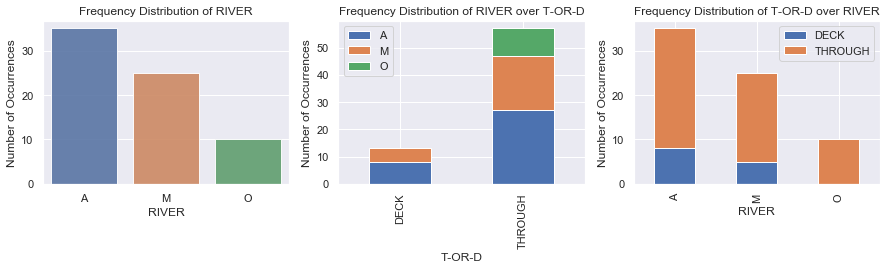

In [20]:
columns_2_avoid = ['ERECTED', 'LENGTH', 'LOCATION']; show_frequency_distribution_predictor(dataset, predictor_name='RIVER', columns_2_avoid=columns_2_avoid, features_vs_values=features_vs_values, hue=TARGET_COL, verbose=1)

The Histogram related to the frequency, in other sense the occurency, of RIVER datset's feature shows us that:
- Among the three main rivers that cross the pittsburgh town, that are *Allegheny*, *Monongahela*, and *Ohio*, the one with the highest number of bridges the first Allegheny, followed by Monongahela, and finally the Ohio river whcih is also the converging river of the former two preciding rivers.
- Instead, if we depict and illustrate the occurency, of RIVER datset's feature over our target variable T-OR-D dataset's feature we can understand that among the two binary values, that are DECK and THROUGH, the second seems the most exploited floor system for building bridges between the opposite edges of the rivers. Furthermore, speaking about bridges built around Ohio river just THROUGH structural element is the only technique adopted for those bridges.
- What we can also sau about RIVER feature is that Allegheny and Monongahela show more or less the same number of bridges made from THROUGH surface, while for DECK surface Allegheny bits all the other rivers and Ohio does not figure among the rivers where there are bridges with DECK like structure at all.

{'AQUEDUCT': 1, 'HIGHWAY': 2, 'RR': 3}
         AQUEDUCT  HIGHWAY    RR
DECK          NaN     11.0   2.0
THROUGH       2.0     40.0  15.0


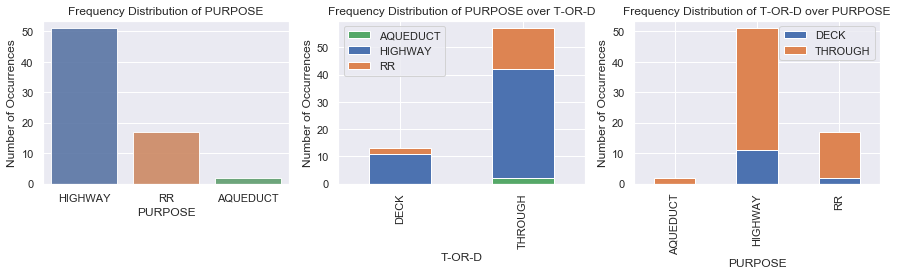

In [31]:
# show_frequency_distribution_predictor_v2(dataset, predictor_name='ERECTED', columns_2_avoid=columns_2_avoid, features_vs_values=features_vs_values, verbose=1)
show_frequency_distribution_predictor(dataset, predictor_name='PURPOSE', columns_2_avoid=columns_2_avoid, features_vs_values=features_vs_values, hue=TARGET_COL, verbose=1)

The Histogram related to the frequency, in other sense the occurency, of PURPOSE datset's feature shows us that:
- The Aqueduct bridges are only of THROUGH kind, and so, there are not occurences of type DECK which are exploited to carry on and support the Acqueduct system.
- In both the two distinct classes, apart from Aqueduct kind of bridges that are just present for THROUGH class, the other two kind of brdiges which are for RR and Highway we can notice clearly that the latter are in proportion the most frequent kind of bridge, which means that the bridges we can found are most often exploited for supporting the traffic of labors that go to work by car.

{'CRAFT': 1, 'EMERGING': 2, 'MATURE': 3, 'MODERN': 4}
         CRAFT  EMERGING  MATURE  MODERN
DECK       NaN       1.0     5.0     7.0
THROUGH    6.0      15.0    25.0    10.0


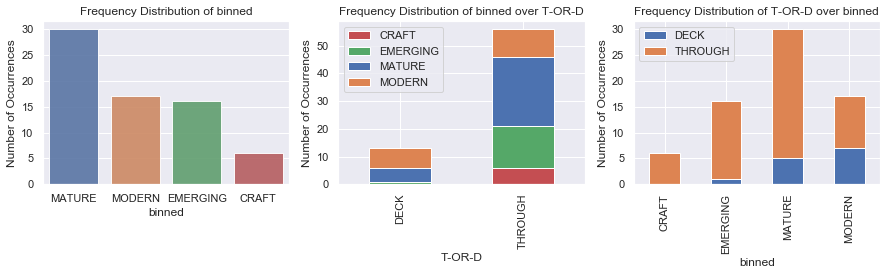

In [21]:
# show_frequency_distribution_predictor_v2(dataset, predictor_name='ERECTED', columns_2_avoid=columns_2_avoid, features_vs_values=features_vs_values, verbose=1)
show_frequency_distribution_predictor(dataset, predictor_name='ERECTED', columns_2_avoid=columns_2_avoid, features_vs_values=features_vs_values, hue=TARGET_COL, verbose=1)

The Histogram related to the frequency, in other sense the occurency, of ERECTED datset's feature shows us that:
- Mature bridges are the most frequent bridges, which means that the bridges have been built with more frequency in the recent period of time, also for substituting oldest bridges or for letting a greater number of labors to reach and enstablish into the city for finding job.
- Then, follow Modern and Emerging bridges, which are more or less comparable in the sense of number of occurences of bridges for those two distinct period of time.
- Lastly, Craft like bridges are the least frequent bridges, moreover, the bridges which have been built just of kind THROUGH.

{'DECK': 1, 'THROUGH': 2}


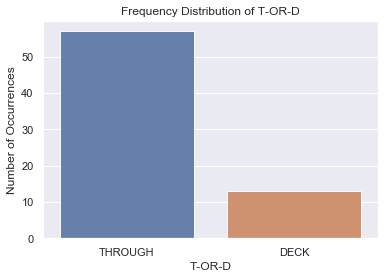

In [22]:
# show_frequency_distribution_predictors(dataset, columns_2_avoid)
show_frequency_distribution_predictor(dataset, predictor_name='T-OR-D', columns_2_avoid=columns_2_avoid, features_vs_values=features_vs_values, verbose=1)

{'G': 1, 'N': 2}
          G   N
DECK      8   5
THROUGH  44  13


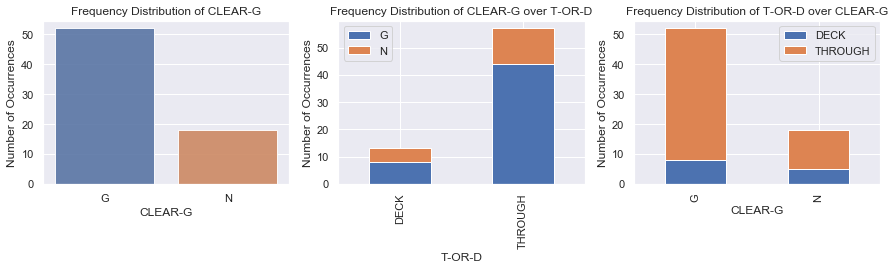

In [23]:
# show_frequency_distribution_predictors(dataset, columns_2_avoid)
show_frequency_distribution_predictor(dataset, predictor_name='CLEAR-G', columns_2_avoid=columns_2_avoid, features_vs_values=features_vs_values, hue=TARGET_COL, verbose=1)

Instead looking at CLEAR-G feature we can notice that the *Vertical Clearance for navigation* is allowed for the majority of the bridges and when looing at the relationship of such a feature with the T-OR-D target variable we can see that THROUGH technology is the most adopted amongst the both the bridges that have or not gained the vertical Clearance for navigation, and in particular the THROUCH system is far more popular than DECK surface system in both G and N bridges, recalling us how the THROUGH technique become so important and widely spread across time and space while speaking about bridge constructing.

{'LONG': 1, 'MEDIUM': 2, 'SHORT': 3}
         LONG  MEDIUM  SHORT
DECK      6.0     7.0    NaN
THROUGH  19.0    31.0    7.0


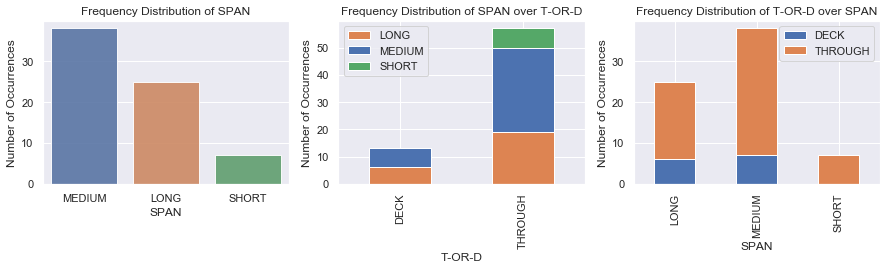

In [24]:
# show_frequency_distribution_predictors(dataset, columns_2_avoid)
show_frequency_distribution_predictor(dataset, predictor_name='SPAN', columns_2_avoid=columns_2_avoid, features_vs_values=features_vs_values, hue=TARGET_COL, verbose=1)

Span is the distance between two intermediate supports for a structure, e.g. a beam or a bridge. A span can be closed by a solid beam or by a rope. The first kind is used for bridges, the second one for power lines, overhead telecommunication lines, some type of antennas or for aerial tramways. With such a definition kept in mind what we can undestand is that:

- looking at the histogram graph about Occurency distribution of Bridge SPAN feature is that, since the three rivers are conisdered to be large riversa long most of their length considering the portion of them that cross the city of Pittsburgh, it becomes natural to observe that MEDIUM Span samples are the most occurring examples, while SHORT Span samples are the least frequent records and LONG span samples range in the between but  seems to reach more closely the MEDIUM Span records.

- As usual, also here, we continue to observe that THROUGH brdiges are the ind of bridges analysing the T-OR-D feature that collect the majority of samples, while DECK bridges are just characterized by brdiges with LONG or MEDIUM Span feature and no SHORT span.

- Moreover, the ration between DECK and THROUGH reaches more or less 1 over 5, that is every 5 THROUGH bridges we find a DECK bridge with either LONG or MEDIUM Span elements.

{'IRON': 1, 'STEEL': 2, 'WOOD': 3}
         IRON  STEEL  WOOD
DECK      NaN   13.0   NaN
THROUGH   4.0   44.0   9.0


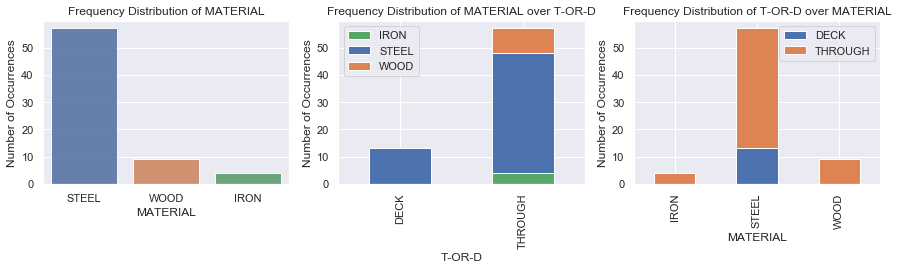

In [25]:
# show_frequency_distribution_predictors(dataset, columns_2_avoid)
show_frequency_distribution_predictor(dataset, predictor_name='MATERIAL', columns_2_avoid=columns_2_avoid, features_vs_values=features_vs_values, hue=TARGET_COL, verbose=1)

In the histohram graph illustrated above, we can clearly understand that:

- the STELL element is the most frequently exploited material for building bridges due to its strengthen and its restinance to the corrosion caused by the surrounding environment, while WOOD-like bridges are still present they are far less frequent than STEEL-like bridges but still have better properties than IRON bridges that are least frequent bridges since Iron leads to heavier bridges and Iron requires more extensive maintanance than Steel bridges and have less elastic properties than Wood brdiges.

- However, THROUGH-like bridges are the kind of bridges that present istances that have all examples of bridges with all the available materials that the dataset has shown, while DECK-like bridges exploit just Steel material for building bridges.

{'F': 1, 'S': 2, 'S-F': 3}
            F     S  S-F
DECK      7.0   NaN  6.0
THROUGH  27.0  21.0  9.0


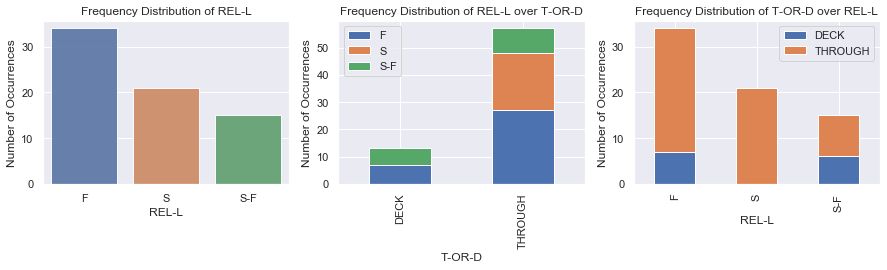

In [26]:
# show_frequency_distribution_predictors(dataset, columns_2_avoid)
show_frequency_distribution_predictor(dataset, predictor_name='REL-L', columns_2_avoid=columns_2_avoid, features_vs_values=features_vs_values, hue=TARGET_COL, verbose=1)

We knwo that The REL-L property is the relative length of the main span to the total crossing length. With this short notion about such a feature in mind, what we can suggest observing ther first histogram depicted above is that:

- FULL kind of Bridge, shortly *F*, is the most frequent example of feature of the Pittsburgh bridges, also, the Through system is the bridge system that the most exploit or is characterized by FULL REL-L property.

- The, SMALL kind of Bridge, shortlu *S* is the second property in number of instances that show such a feature among the bridges and it is only a kind of feature shown only from THROUGH-like bridges, this means that we do not find bridges that show such a property amongs the DECK-like bridges.

- Lastly, an intermediate solution, represented by SMALL-FULL property, shortly *S-F*, is more or less present in both type of bridges that are classified with DECK or THROUGH system speaking about T-OR-D attribute.

{'ARCH': 1, 'CANTILEV': 2, 'CONT-T': 3, 'SIMPLE-T': 4, 'SUSPEN': 5, 'WOOD': 6}
         ARCH  CANTILEV  CONT-T  SIMPLE-T  SUSPEN  WOOD
DECK      1.0       3.0     8.0       1.0     NaN   NaN
THROUGH  10.0       7.0     2.0      22.0     7.0   9.0


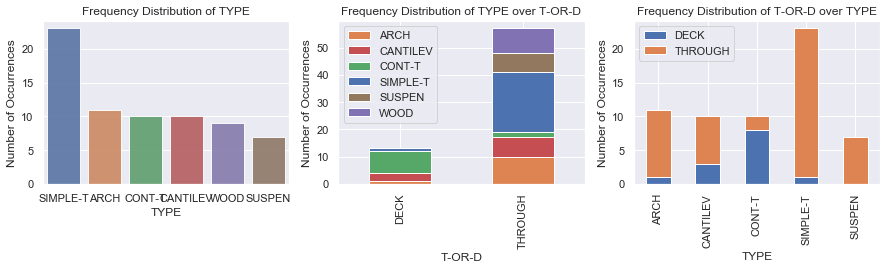

In [27]:
# show_frequency_distribution_predictors(dataset, columns_2_avoid)
show_frequency_distribution_predictor(dataset, predictor_name='TYPE', columns_2_avoid=columns_2_avoid, features_vs_values=features_vs_values, hue=TARGET_COL, verbose=1)

Lastly, we have to speak about the TYPE feature, which is an attribute that refers to the kind of architecture or strucutre used for building the final shape of the bridges. Looking at the first picture above, that is the first Histogram, what we can notice is that:

- SIMPLE-T architecture is the most frequent kind of shape or strucutre adopted to build brdiges amongs the pittsburgh bridges, than it is folowed by ARCH-like brideges.

- Howevere, starting from the ARCH-like brideges and going ahead considering the other remaining kind of technique for giving a strucuture to a bridge, what we can undestand is that these attribute are more or less distrubuted equally, instead SIMPLE-T shows the highest value to refer to the number of instances characterized by SIMPLE-T value for this attribute within the datast.

- Furthermore, DECK-like Birdges are just characterized by up to 4 out of 7 possible values for TYPE attribute, while THROUGH-like bridges show examples of istances from all of the possible kind of architectures for building a bridge.

### Correlation Matrix Analysis

In fields of statistics as well as statistical learning, where the latter comes partly from the former, _correlation matrix_ is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses.
Key decisions to be made when creating a correlation matrix include: choice of correlation statistic, coding of the variables, treatment of missing data, and presentation.
Typically, a correlation matrix is square, with the same variables shown in the rows and columns.

__Applications of a correlation matrix__:
there are three broad reasons for computing a correlation matrix:

- To summarize a large amount of data where the goal is to see patterns. In our example above, the observable pattern is that all the variables highly correlate with each other.
- To input into other analyses. For example, people commonly use correlation matrixes as inputs for exploratory factor analysis, confirmatory factor analysis, structural equation models, and linear regression when excluding missing values pairwise.
- As a diagnostic when checking other analyses. For example, with linear regression, a high amount of correlations suggests that the linear regression estimates will be unreliable.

__Treatment of missing values__:
the data that we use to compute correlations often contain missing values. This can either be because we did not collect this data or don’t know the responses. Various strategies exist for dealing with missing values when computing correlation matrixes. A best practice is usually to use _multiple imputation_. However, people more commonly use _pairwise missing values_ (sometimes known as partial correlations). This involves computing correlation using all the non-missing data for the two variables. Alternatively, some use _listwise deletion_, also known as case-wise deletion, which only uses observations with no missing data. Both pairwise and case-wise deletion assume that data is missing completely at random.

In [28]:
corr_matrix = dataset.corr()

__Coding of the variables__: if you also have data from a survey, you'll need to decide how to code the data before computing the correlations. Changes in codings tend to have little effect, except when extreme.

__Presentation__:
when presenting a correlation matrix, you'll need to consider various options including:

- Whether to show the whole matrix, as above or just the non-redundant bits, as below (arguably the 1.00 values in the main diagonal should also be removed).
- How to format the numbers (for example, best practice is to remove the 0s prior to the decimal places and decimal-align the numbers, as above, but this can be difficult to do in most software).
- Whether to show statistical significance (e.g., by color-coding cells red).
- Whether to color-code the values according to the correlation statistics (as shown below).
- Rearranging the rows and columns to make patterns clearer.

This shows correlations between the stated importance of various things of attributes used to describe records, examples, and samples within bridge dataset. The line of 1.00s going from the top left to the bottom right is the main diagonal, which shows that each variable always perfectly correlates with itself. This matrix is symmetrical, with the same correlation is shown above the main diagonal being a mirror image of those below the main diagonal.

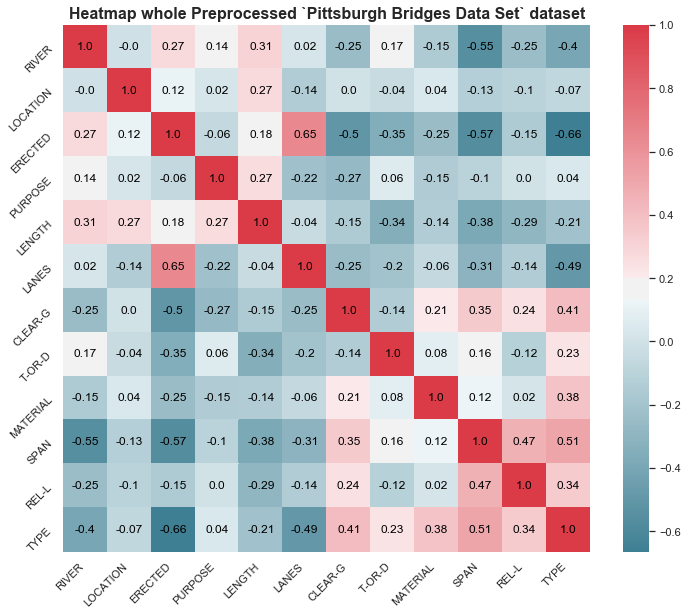

In [29]:
display_heatmap(corr_matrix)

This kind of presentation allows us, once we choose a row number and column number let's say _ith-row_ and _jth-column_, we can check locally the value assigned by the correlection factor to the pair made from to distinct features if _"i"_ strctly different from _"j"_. As an instance, what we can suggest observing the correlation matrix depicted just above, as well as exploting some common properties of symmetic and square matrices, is that:
- along the area that spread near the main diagonal the resulting features pairs seemes to either positively moderately correlate or positively waekly correlate.
- Convercely, along the area that spreads near the anti-diagonal matrix the resulting features pairs seems to instead either negatively moderately correlate or negatively waekly correlate.

Finally, as examples, in order to exploit the fact that we can access directly to the correlaction valuecomputed by means the math formula provided by the expression of correlation facotr, we can say that:
- the pair represented by ERECTED and LANES (3d-row, 6th col) features seems to moderately positively correlate, with a value equals to 0.65. This is also reasoable since that by the time while the Pittsburgh city was growing in size also the need of more infrastructures and building for working and let the people in town to leave, lead to increase in winde the different bridges to manage the traffic from and to the city.
- on the other hand, still speaking about ERECTED feature, when it is coupled with TYPE feature (3d-row, 12th col) we see in contrast that them are characterized by a negative value of correlation that lead to interprete the pair as negatively moderately correlated. The principal reason about such a behavior may be imputed by the observation that through the different years the building techniques and technologies have been employed to constrcut better, stronger bridges abandoning oldest techniques which instead imply the exploitation of less technological materials sucha s wood that requires instead more frequently maintenance tasks.

### Pie chart as a continuation of Correlation Matrix Analysis

Here, within this subsequent section, I'm going to discuss and analyse the usefulness of exploiting piec-chart like graphs for describing some features or beahvior of correlation matrix values.

The first pie chart followed by also a realted histogram both aim at explaining and depicting how the features pairs are distributed among the three main subintervals that are named weak, moderate and strong as facotrs to label the kind of correlation the value of correlation referrend to a given pair represent, which interval are the following:
- weak, if $p_{ith}$: $p_{ith} \leq .5$
- moderate, if $p_{ith}$: $.5 < p_{ith} < .8$
- strong, if $p_{ith}$: $p_{ith} \geq .8$

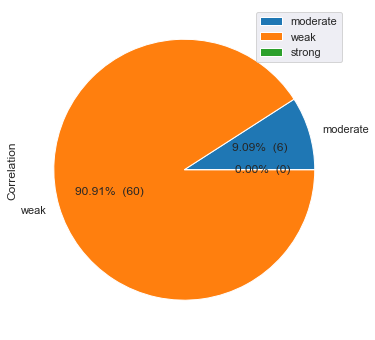

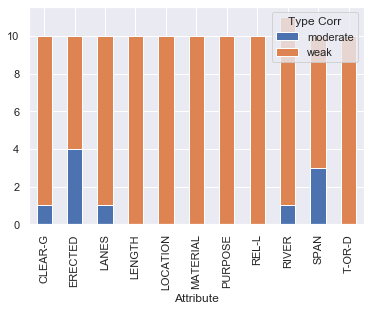

In [30]:
show_pie_hist_charts_abs_corr(corr_matrix, figsize=(2, 2), gridshape=None)

The insight that we can understand is that up to nearly 90.90% of pairs of features is weakly correlated and just 9.09% is moderately correlated, without performing any finer distinction among positively or negatively correlated in each group. While we can notice that no pair is strongly correlated. Moreover, looking at the related histogram, just illustrated below the pie chart, we can clearly understand that just 5 over 12 features are showing also a moderate correlation patterns, which are: CLER-G, ERECTED, LANES; RIVER, and SPAN. Furthermore, we can end up saying that among those 5 features just ERECTED and SPAN shw the larger number of pairs in which them moderately correlate. instead in the majority of cases the possible pairs of features in large measure seem to weakly correlate.

The other two graphs, the first a pie chart and the second a histogram are a kind of zoom in of the other two graphs illustrated in the paragraphs above. In particular those two subsequents graphs aim at exploring in a deeper way the difference about correlation factor, taking into account also the positivness, or convercely the negativness of the kind of correlation, and so not just the information about the strongness in absolute value of the correlation factor.